# Probar Web API ya creada en forma pública para utilizar modelo entrenado para naves de StarWars con TensorFlow+Keras usando Flask y ngrok

In [1]:
#@title Accede al Drive

# Acceder al drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
#@title Probar Web API remota para Datos con un ejemplo tomado al azar del drive

import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output
import pandas as pd
import random
import os
import csv

import json
import requests

# función auxiliar para probar API
def ejecutarModelWebAPI_datos(dictValues, URL_API, mostrarRes=True):
  # ejecuta la web API usando request
  headers = {"content-type": "application/json",
             "ngrok-skip-browser-warning": "69420" }
  data_json = json.dumps( dictValues )
  json_response = requests.post(URL_API, data=data_json, headers=headers)
  if json_response.status_code == 200:
    res = json.loads(json_response.text)
    if mostrarRes:
      print("\t", json_response, "-", res)
    return res["data"]
  else:
    if mostrarRes:
      print("\t", json_response, ":", json_response.content)
    return "ERROR"


#@markdown ### Web API:
ngrok_public_Web_API_datos = "https://91d8e4ca99fe.ngrok-free.app/SWdatos" #@param{type:"string"}

#@markdown ### Archivo de datos a utilizar:
path = '/content/gdrive/MyDrive/IA/demoStarWars/datos/'  #@param {type:"string"}
archivo_datos = 'naves.csv'  #@param {type:"string"}
#@markdown ### Configuración del archivo CSV:
delimitador_columnas = ',' #@param {type:"string"}

## selección de los parámetros

# función para cargar configuración datos automática
def cargarNombreClases(path, archivo_datos):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return "", ""

# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  funcionCambiaSeleccion_ConfigDatos(combo_att_clase.value, texto_nomClases.value, combo_att_entrada.value)

# aplica configuración de datos
def funcionCambiaSeleccion_ConfigDatos(attClase, nomClases, att_entrada):
  global ndf
  if (attClase is None) or (attClase =="") or\
    (att_entrada is None) or (att_entrada ==""):
    return
  # si el atributo clase está como de entrada, lo saca (no tiene sentido)
  att_entrada = list(att_entrada)
  if attClase in att_entrada:
    ##print("Eliminando atributo " + attClase + " como de entrada dado que es clase.")
    att_entrada.remove( attClase )
  if (att_entrada == "") or (len(att_entrada)==0):
    print("No se han definido atributos de entrada!")
    return
  # selecciona un ejemplo al azar
  ndf = df.sample()
  # genera los datos solo con los atributos seleccionados
  datosEntrada = ndf[att_entrada].to_dict(orient='records')
  datosClase = ndf[attClase]
  print("\n> Datos enviados: ", datosEntrada)
  print("> Clase Real: ",datosClase)
  # ejecuta API
  res = ejecutarModelWebAPI_datos(datosEntrada,
                                    ngrok_public_Web_API_datos)
  print("\n> Resultado API: ",  res)
  print("")

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos,  sep=delimitador_columnas, engine="python")
print("Archivo de datos ", archivo_datos, " cargado")

# intenta cargar configuración asociada a los datos
# trata de obtener la configuración del archivo asociado
atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos)

# muestra interface para cargar configuración

# auxiliar para que muestre bien la descripción
style_3D = {'description_width': 'initial'}

tit = widgets.Label("Ajuste para configuración de los Datos: ")

# prepara combo para determinar atributo clase
selecc_atributos = [ ]
selecc_atributos.extend( df.columns.values.tolist() )
if (atributo_clase is None) or (atributo_clase=="") or (atributo_clase not in selecc_atributos):
  att_selecc_defecto = len(selecc_atributos)-1
else:
  att_selecc_defecto = selecc_atributos.index(atributo_clase)
combo_att_clase = widgets.Dropdown(
    options = selecc_atributos,
    value = selecc_atributos[att_selecc_defecto], # mostrar por defecto de config
    description = 'Atributo clase:',
    style=style_3D,
    disabled = False,
)
# prepara campo para ingresar nombre clases (toma por defecto de config)
texto_nomClases = widgets.Text(
    value=nombre_clases,
    placeholder='Ingrese nombre clases (si corresponde) separados por comas',
    description='Nombre clases:',
    style=style_3D,
    disabled=False
)

combo_att_entrada = widgets.SelectMultiple(
    options=selecc_atributos,
    value=selecc_atributos,
    #rows=10,
    description='Atributos de entrada:',
    style=style_3D,
    disabled=False
)

# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Enviar al azar'
)
configDatos_ui = widgets.GridBox(
      children=[tit, combo_att_clase, texto_nomClases,
                combo_att_entrada, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

# ejecuta para que muestre
on_buttonAplicar_clicked(btnAplicar)


Archivo de datos  naves.csv  cargado


GridBox(children=(Label(value='Ajuste para configuración de los Datos: '), Dropdown(description='Atributo clas…



> Datos enviados:  [{'Manufacturer': 20.0, 'Length': 7.0, 'Crew': 1.0, 'Troops': 0.0, 'Cargo Capacity': 65.0, 'Consumables': 0.0666666666666666, 'Speed': 100.0, 'Hull': 10.0, 'Hyperdrive Multiplier': -1.0, 'Shields': -1.0, 'Hyperdrive Backup': -1.0, 'Special Features': 0.892039472564675, 'Onboard Craft': 0.0289843350725173, 'LASER CANNONS': 0.0, 'CONCUSSION MISSILE LAUNCHERS': 0.0, 'LIGHT LASER CANNONS': 0.0, 'MEDIUM LASER CANNONS': 0.0, 'DOUBLE BLASTER CANNONS': 0.0, 'QUAD LASER CANNONS': 0.0, 'GRAVITY WELL PROJECTORS': 0.0, 'ION CANNONS': 0.0, 'PROTON TORPEDO LAUNCHERS': 0.0, 'GENERAL PURPOSE LAUNCHERS': 0.0, 'DOUBLE TURBOLASER CANNONS': 0.0, 'TURBOLASER CANNONS': 0.0, 'TRACTOR BEAM PROJECTORS': 0.0, 'LASER CANNON TURRETS': 2.0, 'HEAVY TURBOLASER BATTERIES': 0.0, 'HEAVY LASER CANNONS': 0.0, 'SUPERLASERS': 0.0, 'MEDIUM ION CANNONS': 0.0, 'TURBOLASER BATTERIES': 0.0, 'PROTON TORPEDOS': 0.0, 'ORBITAL MINE OR THERMAL DETONATOR LAUNCHERS.': 0.0, 'TWIN LASER CANNONS': 0.0, 'QUAD BLASTER 

GridBox(children=(Text(value='/content/gdrive/MyDrive/IA/demoStarWars/imagenes', description='Path imágenes:',…



> Imagen:  /content/gdrive/MyDrive/IA/demoStarWars/imagenes/ori/TIE Experimental Craft/96f2e0c4c1b54bd6893fd9c55f4cf88c.png


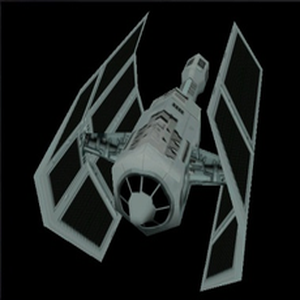

	 <Response [200]> - {'data': {'clase': 'TIE Experimental Craft', 'claseID': 1}, 'message': 'Success', 'statusCode': 200}

> Resultado API:  {'clase': 'TIE Experimental Craft', 'claseID': 1}



> Imagen:  /content/gdrive/MyDrive/IA/demoStarWars/imagenes/train/Transporters/32d337d779904930820b49ef4c2e9a8f.png


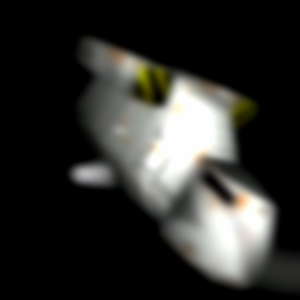

	 <Response [200]> - {'data': {'clase': 'Transporters', 'claseID': 9}, 'message': 'Success', 'statusCode': 200}

> Resultado API:  {'clase': 'Transporters', 'claseID': 9}



> Imagen:  /content/gdrive/MyDrive/IA/demoStarWars/imagenes/test/TIE Experimental Craft/f9521a545e3545d2b8902d81c85b1796.png


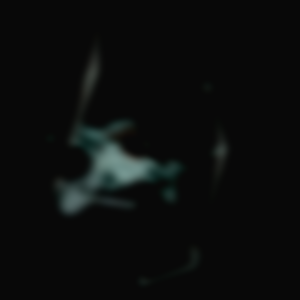

	 <Response [200]> - {'data': {'clase': 'TIE Experimental Craft', 'claseID': 1}, 'message': 'Success', 'statusCode': 200}

> Resultado API:  {'clase': 'TIE Experimental Craft', 'claseID': 1}



In [3]:
#@title Probar Web API local para Imágenes con un ejemplo tomado al azar del drive

import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output
import random
from PIL import Image

import json
import requests


strAZAR = "-AZAR-"


ngrok_public_Web_API_imagenes = "https://91d8e4ca99fe.ngrok-free.app/SWimagen" #@param{type:"string"}

# función auxiliar para probar API
def ejecutarModelWebAPI_imagenes(imageFN, URL_API, mostrarRes=True):
  # prepara la info de la imagen a mandar como archivo
  dictValues = {'image': (os.path.basename(imageFN),
                          open(imageFN, "rb").read(),
                          #'multipart/form-data',
                           {'Expires': '0'}) }
  # ejecuta la web API
    # ejecuta la web API usando request
  headers = {"ngrok-skip-browser-warning": "69420" }
  json_response = requests.post(URL_API, files=dictValues, headers=headers)
  if json_response.status_code == 200:
    res = json.loads(json_response.text)
    if mostrarRes:
      print("\t", json_response, "-", res)
    return res["data"]
  else:
    if mostrarRes:
      print("\t", json_response, ":", json_response.content)
    return "ERROR"

def procesarImagen(imageFN):
  print("\n> Imagen: ", imageFN)
  display( Image.open(imageFN) )
  # ejecuta API
  res = ejecutarModelWebAPI_imagenes(imageFN,
                                    ngrok_public_Web_API_imagenes)
  print("\n> Resultado API: ",  res)
  print("")
  return res

# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  # determina directorio y elege un archivo al azar
  if combo_clase.value==strAZAR:
    combo_clase_dir = random.choice(all_image_classes[0:-1])
  else:
    combo_clase_dir = combo_clase.value
  class_path = path_imagenes.value + "/" + path_imagenes_tipo.value + "/" + combo_clase_dir
  images_in_class_path = os.listdir( class_path )
  imageFN = random.choice(images_in_class_path)
  procesarImagen(class_path + "/" + imageFN)

# permite seleccionar una clase y toma una imagen al azar
path_imagenes = widgets.Text(
    value='/content/gdrive/MyDrive/IA/demoStarWars/imagenes',
    description='Path imágenes:',
    disabled=False,
    style= {'description_width': 'initial', 'width': 'initial'},
    layout = widgets.Layout(width='500px')
)
path_imagenes_tipo = widgets.Dropdown(
    options = ["ori", "train", "test"],
    value = "ori",
    description = "Tipo path imágenes:",
    disabled = False,
    style= {'description_width': 'initial', 'width': 'initial'}
)
all_image_classes = os.listdir( path_imagenes.value + "/" + path_imagenes_tipo.value )
all_image_classes.append( strAZAR )
combo_clase = widgets.Dropdown(
    options = all_image_classes,
    description = 'Clase a procesar:',
    value = strAZAR,
    disabled = False,
    style= {'description_width': 'initial', 'width': 'initial'}
)
# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Ejecutar'
)
configDatos_ui = widgets.GridBox(
      children=[path_imagenes, path_imagenes_tipo, combo_clase, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

on_buttonAplicar_clicked(btnAplicar)